In [2]:
# ===========================
# 1. Import Libraries
# ===========================

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [5]:

# ===========================
# 2. Load Dataset
# ===========================

df = pd.read_csv(r"D:\AI_Project_2026\AI\AI_2026\Day05 Decision tree and Essemble method\groupA\po_movieLens\bank.csv")  
# change path according to your kaggle dataset

print(df.head())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [10]:

# ===========================
# 3. Encode Text Columns
# ===========================

df_encoded = pd.get_dummies(df, drop_first=True)



In [11]:

# ===========================
# 4. Define Features + Target
# ===========================

X = df_encoded.drop("deposit_yes", axis=1)
y = df_encoded["deposit_yes"]

feature_cols = X.columns


In [12]:

# ===========================
# 5. Train Test Split
# ===========================


X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)


In [13]:


# ===========================
# 6. Decision Tree Model
# ===========================

dt_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train,y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curren

In [14]:

# ===========================
# 7. Prediction
# ===========================

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

print("Accuracy :",accuracy)


Accuracy : 0.793999104343932


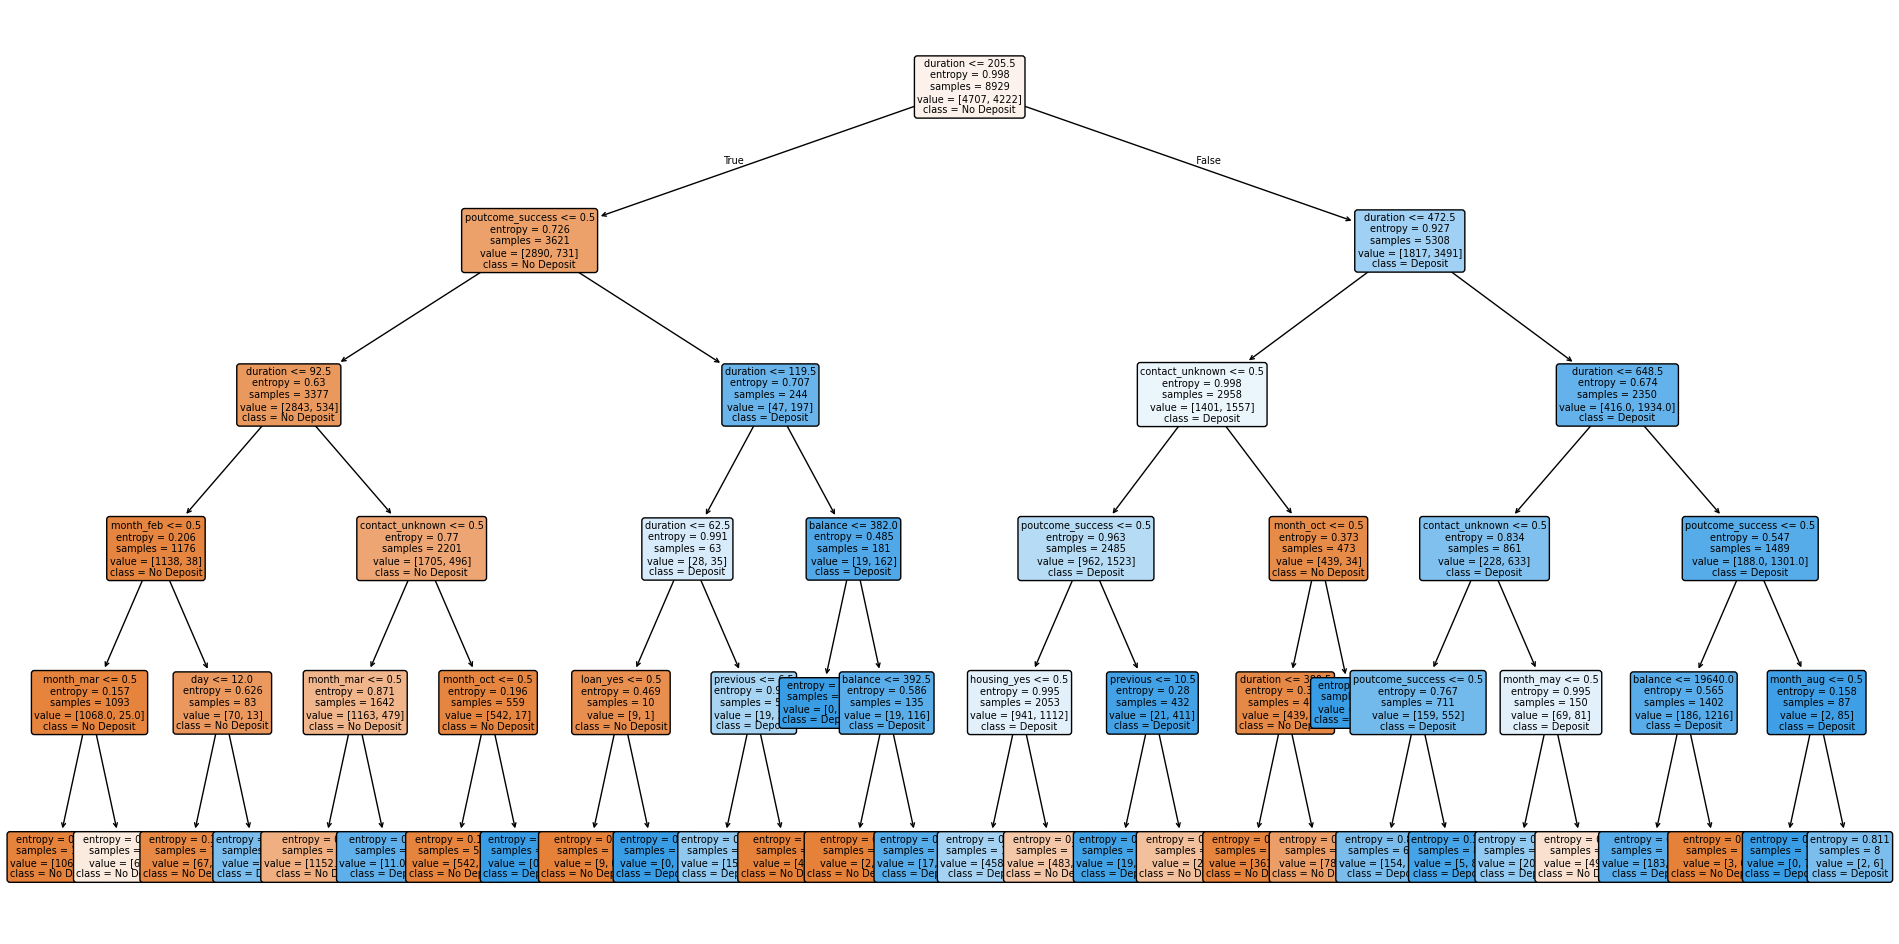

In [15]:

# ===========================
# 8. Decision Tree Diagram
# ===========================

plt.figure(figsize=(24,12))

plot_tree(
    dt_model,
    feature_names=feature_cols,
    class_names=["No Deposit","Deposit"],
    filled=True,
    rounded=True,
    fontsize=7
)

plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# ==========================
# Feature Importance DataFrame
# ==========================

importance = pd.DataFrame({

    "Feature": feature_cols,
    "Importance": dt_model.feature_importances_

})

# Importance အများဆုံးကနေ အနည်းဆုံးထိ sort
importance = importance.sort_values(
    by="Importance",
    ascending=False
)

print("Top Features")

display(importance.head(10))

Top Features


,Feature,Importance
3,duration,0.578272
40,poutcome_success,0.164653
27,contact_unknown,0.159149
24,housing_yes,0.033151
34,month_mar,0.024222
37,month_oct,0.014158
1,balance,0.006566
2,day,0.005685
30,month_feb,0.005168
6,previous,0.003553


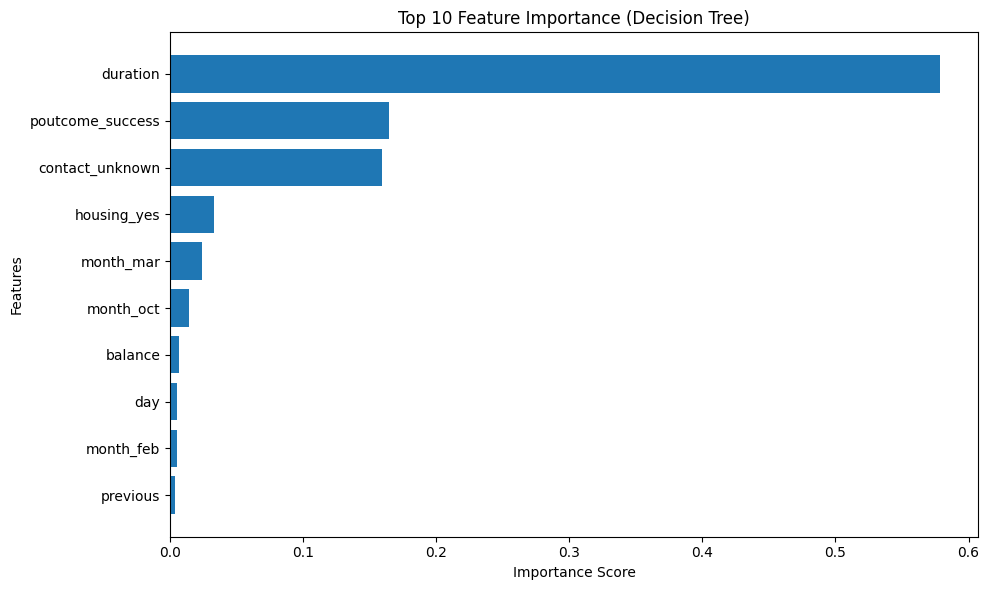

In [17]:
plt.figure(figsize=(10,6))

plt.barh(
    importance["Feature"][:10],
    importance["Importance"][:10]
)

plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.title("Top 10 Feature Importance (Decision Tree)")

plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()